# College Scorecard Analysis
#### Course: IST 652 - Scripting for Data Analysis
#### Date: 05/05/2023
##### Group Members: Vik Dasari, Wei Lao, Nein Tzu Shih, Joseph Eovaldi

## Project Summary: 

The quality and expense of education in American universities can vary greatly depending on factors such as the institution's reputation, location, academic programs, and funding.

In general, American universities are known for their high-quality education and world-class research facilities. However, the cost of attending these institutions can be quite expensive, with tuition and fees averaging around  \\$39,400 per year at private universities and \\$10,950-$28,240 per year for public universities for in-state and out-of-state students, respectively (source: College Board, 2022).

According to a report by U.S. News & World Report, some of the top-ranked universities in the United States for 2022 include Princeton University, Harvard University, and Columbia University. These institutions are known for their rigorous academic programs, renowned faculty, and cutting-edge research.

However, a recent study by the College Board found that the cost of attending college has been increasing faster than inflation, making it more difficult for students and their families to afford higher education. This trend has led to concerns about the affordability and accessibility of higher education in the United States.

Thus, we would like to understand the landscape of American universities, and our analysis is categorized into four key areas for the purpose of this project...

>1.) Gender differences and student earnings
<br>
2.) Education cost and returns
<br>
3.) Faculty Salary and its influence
<br>
>4.) Regional differences

In [2]:
# Import all libraries needed to generate the code below
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
!pip install folium
import folium

## Data Processing and Cleaning

In [3]:
# The College Scorecard API is a GET API that lives at http://api.data.gov/ed/collegescorecard/
# The endpoint for querying all data is /v1/schools
api_key = 'wmcUvl5tOLyj8VG0mKJ0UctsCAmauI0HDLNYsgNP'
base_url = "https://api.data.gov/ed/collegescorecard/v1/schools?"
base_url = f"{base_url}api_key={api_key}&fields="
base_url

'https://api.data.gov/ed/collegescorecard/v1/schools?api_key=wmcUvl5tOLyj8VG0mKJ0UctsCAmauI0HDLNYsgNP&fields='

In [4]:
# List of all the search conditions
parameters = ["&school.operating=1"]

# Appending all the conditions values to construct the conditionss_url
parameters_url = ""
for parameter in parameters:
    parameters_url = parameters_url + parameter
parameters_url


'&school.operating=1'

In [5]:
# Dictionary all the desired fields
year = "latest"
fields = {
          # School Category
          "School Name": "school.name",
          "School ID": "id",
          "School State": "school.state",
          "School Ownership": "school.ownership",
          "Full-time Faculty Rate (%)": "school.ft_faculty_rate",
          "Faculty's average salary per month": "school.faculty_salary",

          # Student Category
          "Student Enrollment Size": year + ".student.size",
          "Student Enrollment All": year + ".student.enrollment.all",
          "Male Students (%)": year + ".student.demographics.men",
          "Female Students (%)": year + ".student.demographics.women",
          "Retention Rate 4Yr (%)": year + ".student.retention_rate.four_year.full_time",

          # Cost Category
          "Attendance Cost per Academic Year": year + ".cost.attendance.academic_year",
          "Avg Cost for public": year +".cost.avg_net_price.public",
          "Avg Cost for private": year + ".cost.avg_net_price.private",
          
          # Aid Category
          "Student Loan": year +".aid.students_with_any_loan",

          # Completion Category
          "150% Completion Rate at 4Yr (%)": year + ".completion.completion_rate_4yr_150nt",
    
          # Admissions Category
          "Admission Rate (%)": year + ".admissions.admission_rate.overall",
          "SAT Average Overall": year + ".admissions.sat_scores.average.overall",
          "SAT 75th Percentile Critical Math": year + ".admissions.sat_scores.75th_percentile.math",
          "SAT 75th Percentile Critical Reading": year + ".admissions.sat_scores.75th_percentile.critical_reading",
          "SAT 75th Percentile Critical Writing": year + ".admissions.sat_scores.75th_percentile.writing",
    
          ## Earnings Category
          # 6 Years after Enrollment:
          "Mean Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings",
          "Mean Male Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.male_students",
          "Mean Female Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.female_students",
          "Std. Deviation Earning (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.std_dev",
          "Percent of Students Earning >$25K (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.percent_greater_than_25000",
          "Low Income Students (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.lowest_tercile",
          "Medium Income Students (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.middle_tercile",
          "High Income Students (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.highest_tercile",
          "Mean Earnings Low (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.lowest_tercile",
          "Mean Earnings Medium (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.middle_tercile",
          "Mean Earnings High (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.highest_tercile",
          # 10 Years after Enrollment:
          "Mean Earnings (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings",
          "Mean Male Earnings (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.male_students",
          "Mean Female Earnings (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.female_students",
          "Std. Deviation Earning (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.std_dev",
          "Percent of Students Earning >$25K (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.percent_greater_than_25000",
          "Low Income Students (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.lowest_tercile",
          "Medium Income Students (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.middle_tercile",
          "High Income Students (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.highest_tercile",
          "Mean Earnings Low (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.lowest_tercile",
          "Mean Earnings Medium (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.middle_tercile",
          "Mean Earnings High (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.highest_tercile"
         }
# Appending all the fields values to construct the fields_url
fields_url = ""
for key, val in fields.items():
    fields_url = fields_url + val + ","

# To remove the extra "," at the end of fields_url
fields_url = fields_url[:-1]
fields_url

'school.name,id,school.state,school.ownership,school.ft_faculty_rate,school.faculty_salary,latest.student.size,latest.student.enrollment.all,latest.student.demographics.men,latest.student.demographics.women,latest.student.retention_rate.four_year.full_time,latest.cost.attendance.academic_year,latest.cost.avg_net_price.public,latest.cost.avg_net_price.private,latest.aid.students_with_any_loan,latest.completion.completion_rate_4yr_150nt,latest.admissions.admission_rate.overall,latest.admissions.sat_scores.average.overall,latest.admissions.sat_scores.75th_percentile.math,latest.admissions.sat_scores.75th_percentile.critical_reading,latest.admissions.sat_scores.75th_percentile.writing,latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.6_yrs_after_entry.mean_earnings.male_students,latest.earnings.6_yrs_after_entry.mean_earnings.female_students,latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.6_yrs_after_entry.percent_greater_th

In [6]:
# Getting number of records returned to set the max page number
query_url = f"{base_url}{fields_url}{parameters_url}&page=0"
response = requests.get(query_url).json()
#print(response)

In [7]:
max_page_num = response["metadata"]["total"]//100 + 1
max_page_num

65

In [8]:
# Constructing the dataframe from the API request response

# Initializing variables
school_df = []
per_page = 100

for page_num in range(0,max_page_num):
    query_url = f"{base_url}{fields_url}{parameters_url}&page={page_num}&_per_page={per_page}"
    response = requests.get(query_url).json()
    
    for x in range(len(response["results"])):
        result_row = {}
        
        for key, val in fields.items(): 
            try:
                result_row[key] = response["results"][x][val]
            except KeyError:
                print(f"{key} key not found")
                
        school_df.append(result_row)

        
school_df = pd.DataFrame(school_df)


In [9]:
# Join the two different 'private' school columns into one, so we just have a public and private school column
school_df["School Ownership"] = school_df["School Ownership"].replace({1: "public", 2: "private", 3: "private"})

In [10]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   School Name                                             6408 non-null   object 
 1   School ID                                               6408 non-null   int64  
 2   School State                                            6408 non-null   object 
 3   School Ownership                                        6408 non-null   object 
 4   Full-time Faculty Rate (%)                              3496 non-null   float64
 5   Faculty's average salary per month                      3863 non-null   float64
 6   Student Enrollment Size                                 5658 non-null   float64
 7   Student Enrollment All                                  0 non-null      object 
 8   Male Students (%)                     

In [11]:
school_df.head()

School Name  School ID School State  \
0             Alabama A & M University     100654           AL   
1  University of Alabama at Birmingham     100663           AL   
2                   Amridge University     100690           AL   
3  University of Alabama in Huntsville     100706           AL   
4             Alabama State University     100724           AL   

  School Ownership  Full-time Faculty Rate (%)  \
0           public                      0.6833   
1           public                      0.7564   
2          private                      0.7872   
3           public                      0.6538   
4           public                      0.6812   

   Faculty's average salary per month  Student Enrollment Size  \
0                              8779.0                   5098.0   
1                             11590.0                  13284.0   
2                              4672.0                    251.0   
3                              9820.0                   7358.0   
4                              7701.0                   3495.0   

  Student Enrollment All  Male Students (%)  Female Students (%)  ...  \
0                   None             0.4060               0.5940  ...   
1                   None             0.3790               0.6210  ...   
2                   None             0.3147               0.6853  ...   
3                   None             0.5953               0.4047  ...   
4                   None             0.3505               0.6495  ...   

   Mean Male Earnings (10 Yrs after Entry)  \
0                                  38500.0   
1                                  57400.0   
2                                  56000.0   
3                                  58700.0   
4                                  33000.0   

   Mean Female Earnings (10 Yrs after Entry)  \
0                                    32600.0   
1                                    43200.0   
2                                    38700.0   
3                                    46000.0   
4                                    28300.0   

   Std. Deviation Earning (10 Yrs after Entry)  \
0                                      30483.0   
1                                      50197.0   
2                                          NaN   
3                                      47065.0   
4                                      25085.0   

   Percent of Students Earning >$25K (10 Yrs after Entry)  \
0                                              0.599        
1                                              0.747        
2                                              0.696        
3                                              0.779        
4                                              0.528        

   Low Income Students (10 Yrs after Entry)  \
0                                     924.0   
1                                    1279.0   
2                                      81.0   
3                                     703.0   
4                                    1524.0   

   Medium Income Students (10 Yrs after Entry)  \
0                                        457.0   
1                                        947.0   
2                                         48.0   
3                                        483.0   
4                                        582.0   

   High Income Students (10 Yrs after Entry)  \
0                                      197.0   
1                                      743.0   
2                                        NaN   
3                                      428.0   
4                                      168.0   

   Mean Earnings Low (10 Yrs after Entry)  \
0                                 33000.0   
1                                 47000.0   
2                                     NaN   
3                                 47000.0   
4                                 29000.0   

   Mean Earnings Medium (10 Yrs after Entry)  \
0                                    37300.0   
1                  

## Research Question 1: Gender Differences

1.) How much are mean student earnings split on gender affected by the university they attend?

2.) What is the baseline for mean earnings ten years after a student attends a university? Does it differ by gender?

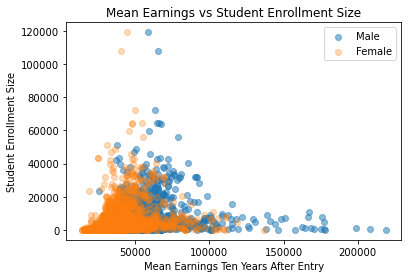

In [11]:
# Filter data to get mean earnings for male and female ten years afetr entry
#Filter data to get the student enrollment size
df_filtered_male_earnings = school_df[['Mean Male Earnings (10 Yrs after Entry)','Student Enrollment Size']].dropna()
df_filtered_female_earnings = school_df[['Mean Female Earnings (10 Yrs after Entry)','Student Enrollment Size']].dropna()

# Create a scatter plot of 'Mean Earnings' and 'University Enrollment size' with transparency 0.5
plt.scatter(df_filtered_male_earnings['Mean Male Earnings (10 Yrs after Entry)'], df_filtered_male_earnings['Student Enrollment Size'], 
            label='Male', alpha=0.5)

# Create a scatter plot of 'Mean Earnings' and 'University Enrollment size' with transparency 0.5
plt.scatter(df_filtered_female_earnings['Mean Female Earnings (10 Yrs after Entry)'], df_filtered_female_earnings['Student Enrollment Size'], 
            label='Female', alpha=0.3)

# Set the labels and title of the plot
plt.xlabel('Mean Earnings Ten Years After Entry')
plt.ylabel('Student Enrollment Size')
plt.title('Mean Earnings vs Student Enrollment Size')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

From this scatterplot we can determine that students who earn the most attended smaller schools, since their enrollment sizes would be lower. Additionally, it can be inferred that males who attended smaller schools earned up to a maximum of \\$225,000 10 years after graduation, whereas females earned up to a maximum of \\$145,000. 

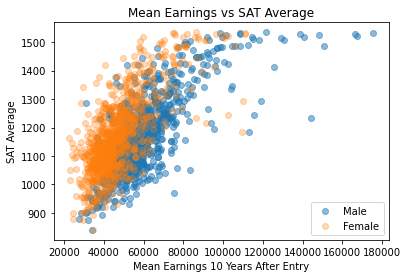

In [12]:
# Filter data to get mean earnings for male and female ten years afetr entry
#Filter data to get the student SAT average
df_filtered_male_earnings_sat = school_df[['Mean Male Earnings (10 Yrs after Entry)','SAT Average Overall']].dropna()
df_filtered_female_earnings_sat = school_df[['Mean Female Earnings (10 Yrs after Entry)','SAT Average Overall']].dropna()

# Create a scatter plot of 'Mean Earnings' and 'SAT Average Score' with transparency 0.5
plt.scatter(df_filtered_male_earnings_sat['Mean Male Earnings (10 Yrs after Entry)'], df_filtered_male_earnings_sat['SAT Average Overall'], 
            label='Male', alpha=0.5)

# Create a scatter plot of 'Mean Earnings' and 'SAT Average Score' with transparency 0.5
plt.scatter(df_filtered_female_earnings_sat['Mean Female Earnings (10 Yrs after Entry)'], df_filtered_female_earnings_sat['SAT Average Overall'], 
            label='Female', alpha=0.3)

# Set the labels and title of the plot
plt.xlabel('Mean Earnings 10 Years After Entry')
plt.ylabel('SAT Average')
plt.title('Mean Earnings vs SAT Average')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

This scatterplot of Mean Earnings vs. SAT Average shows us that schools with a higher average SAT score had some students who ended up earning better pay, but it doesn't seem to be that much of a big influence after a salary threshold of \\$60,000. Also, males who scored above 1300 earn up to \\$180,000, while females who scored the same earn much less (barely crossing \\$110,000).

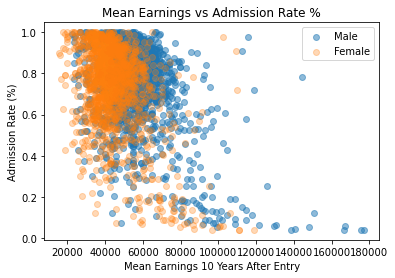

In [13]:
# Filter data to get mean earnings for male and female ten years afetr entry
#Filter data to get the Univeristy admission rate
df_filtered_male_earnings_admission = school_df[['Mean Male Earnings (10 Yrs after Entry)','Admission Rate (%)']].dropna()
df_filtered_female_earnings_admission = school_df[['Mean Female Earnings (10 Yrs after Entry)','Admission Rate (%)']].dropna()

# Create a scatter plot of 'Mean Earnings' and 'Admission Rate %' with transparency 0.5
plt.scatter(df_filtered_male_earnings_admission['Mean Male Earnings (10 Yrs after Entry)'], df_filtered_male_earnings_admission['Admission Rate (%)'], 
            label='Male', alpha=0.5)

# Create a scatter plot of 'Mean Earnings' and 'Admission Rate %' with transparency 0.5
plt.scatter(df_filtered_female_earnings_admission['Mean Female Earnings (10 Yrs after Entry)'], df_filtered_female_earnings_admission['Admission Rate (%)'], 
            label='Female', alpha=0.3)

# Set the labels and title of the plot
plt.xlabel('Mean Earnings 10 Years After Entry')
plt.ylabel('Admission Rate (%)')
plt.title('Mean Earnings vs Admission Rate %')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Plotting Mean Earnings vs. Admission Rate shows us that these two varaibles have a direct negative relationship. Schools with lower admission rates have students who end up earning more money. Also, males who attended schools that have an admission rate less than 20% earned up \\$180,000, while females in the same universities only earned up to \\$120,000.  

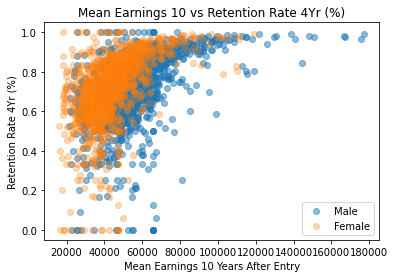

In [14]:
# Filter data to get mean earnings for male and female ten years afetr entry
#Filter data to get the University retention rate
df_filtered_male_earnings_retention = school_df[['Mean Male Earnings (10 Yrs after Entry)','Retention Rate 4Yr (%)']].dropna()
df_filtered_female_earnings_retention = school_df[['Mean Female Earnings (10 Yrs after Entry)','Retention Rate 4Yr (%)']].dropna()

# Create a scatter plot of 'Mean Earnings' and 'Retention Rate %' with transparency 0.5
plt.scatter(df_filtered_male_earnings_retention['Mean Male Earnings (10 Yrs after Entry)'], df_filtered_male_earnings_retention['Retention Rate 4Yr (%)'], 
            label='Male', alpha=0.5)

# Create a scatter plot of 'Mean Earnings' and 'Retention Rate %' with transparency 0.5
plt.scatter(df_filtered_female_earnings_retention['Mean Female Earnings (10 Yrs after Entry)'], df_filtered_female_earnings_retention['Retention Rate 4Yr (%)'], 
            label='Female', alpha=0.3)

# Set the labels and title of the plot
plt.xlabel('Mean Earnings 10 Years After Entry')
plt.ylabel('Retention Rate 4Yr (%)')
plt.title('Mean Earnings 10 vs Retention Rate 4Yr (%)')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Schools with lower rates typically have students who end up not earning good pay. This is shown by the fact that schools that have a retention rate below 40% seem to have a maximum earnings rate for their students of \\$80,000. Retention rate is a great indicator of how well a university can serve their students. Higher rates of retention show us that universities lack fundamental resources for students, causing them to transfer or drop-out before they finish their degrees. 

## Research Question 2: Education Cost and Return
1.) Will a private university student have a better financial status than a public university Student?

2.) Does education cost play a role in students' future earnings?

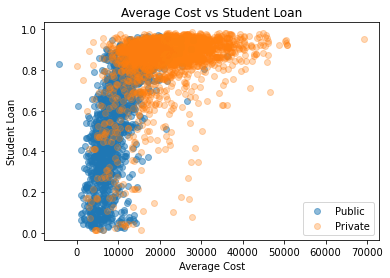

In [15]:
# Filter the data to only include non-null values of 'Avg Cost for public',
# 'Avg Cost for private', and 'Student Loan'
df_filtered_public = school_df[['Avg Cost for public','Student Loan']].dropna()
df_filtered_private = school_df[['Avg Cost for private','Student Loan']].dropna()

# Create a scatter plot of 'Avg Cost for public' and 'Student Loan' with transparency 0.5
plt.scatter(df_filtered_public['Avg Cost for public'], df_filtered_public['Student Loan'], 
            label='Public', alpha=0.5)

# Create a scatter plot of 'Avg Cost for private' and 'Student Loan' with transparency 0.3
plt.scatter(df_filtered_private['Avg Cost for private'], df_filtered_private['Student Loan'], 
            label='Private', alpha=0.3)

# Set the labels and title of the plot
plt.xlabel('Average Cost')
plt.ylabel('Student Loan')
plt.title('Average Cost vs Student Loan')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

This plot shows us that private school students not only pay more than public school students, but also that they acquire more loans to pay for their tuition. The exact reasons for this have to be researched further as the reasoning could be differ on a case-by-case basis.

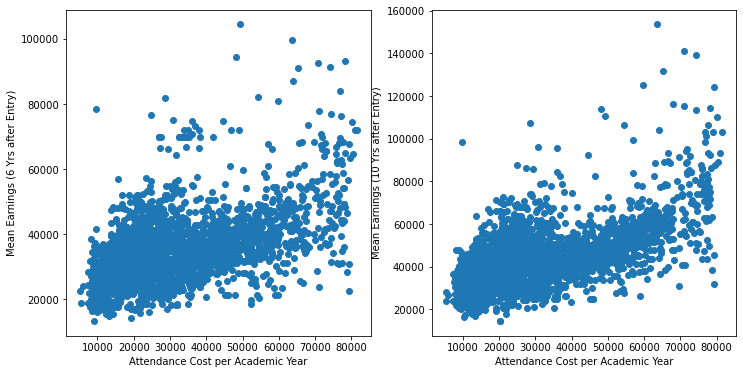

In [17]:
# Create quartiles for Attendance Cost per Academic Year, Mean Earnings (6 Yrs after Entry), and Mean Earnings (10 Yrs after Entry)
df['Attendance Cost per Academic Year_quartiles'] = pd.qcut(df['Attendance Cost per Academic Year'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['Mean Earnings (6 Yrs after Entry)_quartiles'] = pd.qcut(df['Mean Earnings (6 Yrs after Entry)'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['Mean Earnings (10 Yrs after Entry)_quartiles'] = pd.qcut(df['Mean Earnings (10 Yrs after Entry)'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Plot the relationships using scatter plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(df['Attendance Cost per Academic Year'], df['Mean Earnings (6 Yrs after Entry)'])
axs[0].set_xlabel('Attendance Cost per Academic Year')
axs[0].set_ylabel('Mean Earnings (6 Yrs after Entry)')

axs[1].scatter(df['Attendance Cost per Academic Year'], df['Mean Earnings (10 Yrs after Entry)'])
axs[1].set_xlabel('Attendance Cost per Academic Year')
axs[1].set_ylabel('Mean Earnings (10 Yrs after Entry)')

plt.show()

Both of these plots show us that there is no clear distinction between the dsitribution of salary 6 years after and 10 years after graduation compared to the academic cost of a university. There is a small increase in mean earnings up to an academic cost of \\$70,000, but the earnings rise sharply after that threshold.

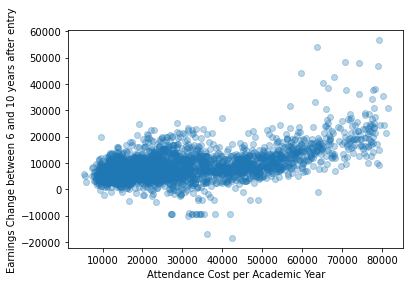

In [16]:
df = school_df
# Create a new column with the y variable
df['y_variable'] = df['Mean Earnings (10 Yrs after Entry)'] - df['Mean Earnings (6 Yrs after Entry)']

# Select the x and y variables
x = df['Attendance Cost per Academic Year']
y = df['y_variable']

# Create a scatter plot
plt.scatter(x, y, alpha=0.3)
plt.xlabel('Attendance Cost per Academic Year')
plt.ylabel('Earnings Change between 6 and 10 years after entry')
plt.show()

The significant takeaway from this plot is that students who pay below \\$70,000 for tuition will not see a drastic earnings change 6-10 years after graduation. Interestingly, students who attended universities that costed more than \\$70,000 per year saw a drastic change in their earnings. It can be inferred that those students and their families that are capable of paying that much money per year have greater resources and more robust support systems which directly influence earnings.

In [26]:
#installing plotly
!pip install plotly

     |████████████████████████████████| 15.3 MB 7.8 MB/s eta 0:00:01    |█████████████████▋              | 8.4 MB 7.8 MB/s eta 0:00:01


In [29]:
# Define quartiles
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']

# Compute quartiles for each column and convert to strings
attendance_quartiles = pd.qcut(df['Attendance Cost per Academic Year'], q=4, labels=quartiles, duplicates='drop').astype(str)
earnings6_quartiles = pd.qcut(df['Mean Earnings (6 Yrs after Entry)'], q=4, labels=quartiles, duplicates='drop').astype(str)
earnings10_quartiles = pd.qcut(df['Mean Earnings (10 Yrs after Entry)'], q=4, labels=quartiles, duplicates='drop').astype(str)

# Define new labels with quartile information
new_labels = []
for i in range(len(attendance_quartiles)):
    label = 'A:' + attendance_quartiles[i] + '\nE6:' + earnings6_quartiles[i] + '\nE10:' + earnings10_quartiles[i]
    new_labels.append(label)

# Define Sankey plot
fig = go.Figure(go.Sankey(
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = new_labels,
      color = "blue"
    ),
    link = dict(
       source = [9, 9, 9, 9, 10, 10, 10, 10],
      target = [1, 4, 7, 10, 2, 5, 8, 11],
      value = [df[(attendance_quartiles == q) & (earnings6_quartiles == q) & (earnings10_quartiles == q)].shape[0] for q in quartiles] + 
              [df[(attendance_quartiles != q1) & (attendance_quartiles == q2) & (earnings6_quartiles == q2) & (earnings10_quartiles == q2)].shape[0] for q1 in quartiles for q2 in quartiles if q2 > q1] +
              [df[(attendance_quartiles != q1) & (attendance_quartiles == q2) & (earnings6_quartiles == q2) & (earnings10_quartiles == q2)].shape[0] for q1 in quartiles for q2 in quartiles if q2 > q1],
      color = "lightblue"
    )
))

fig.show()



#### Key Findings:
* Private school students have higher percentage of taking out loans than public school students

* Higher education cost affects the salary 6 years after graduation, but doesn’t significantly increase average earnings 10 years after graduation

## Research Question 3: Faculty's Influence on Students

1.) Does faculty salary have an effect on student completion?

2.) Does faculty salary have any effect on student earnings in the immediate future?

#### Faculty Salary vs. Student Completion Rate

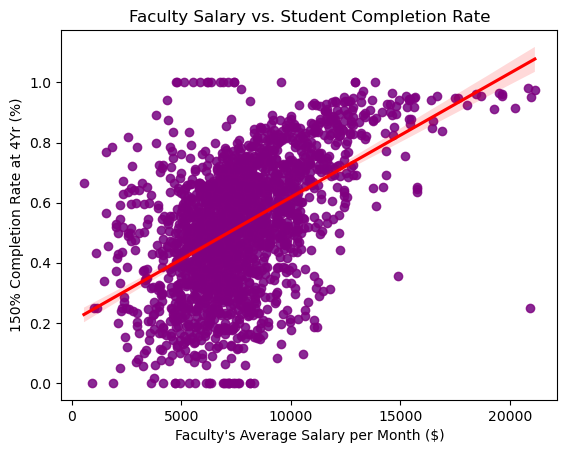

In [73]:
# Create a scatter plot
sns.scatterplot(x='Faculty\'s average salary per month', y='150% Completion Rate at 4Yr (%)', data=school_df, alpha=0.35)

# Add a best fit line
sns.regplot(x='Faculty\'s average salary per month', y='150% Completion Rate at 4Yr (%)', data=school_df, 
            scatter_kws={"color": "purple"}, line_kws={"color": "red"})

# Set axis labels and plot title
plt.xlabel('Faculty\'s Average Salary per Month ($)')
plt.ylabel('150% Completion Rate at 4Yr (%)')
plt.title('Faculty Salary vs. Student Completion Rate')

# Show the plot
plt.show()

This plot shows us that Faculty's Average Salary per Month and Student Completion Rate have a direct positive relationship up to an upper limit of $15,000 per month. Also, the 4-year universities with the lowest student completion rates paid their faculty the lowest amount per month. We can infer that higher faculty salaries mean that the university has more resources and stronger networks with various organizations and support systems. This would positively impact student compeltion rate.

### Faculty Salary vs. Mean Earnings of Students

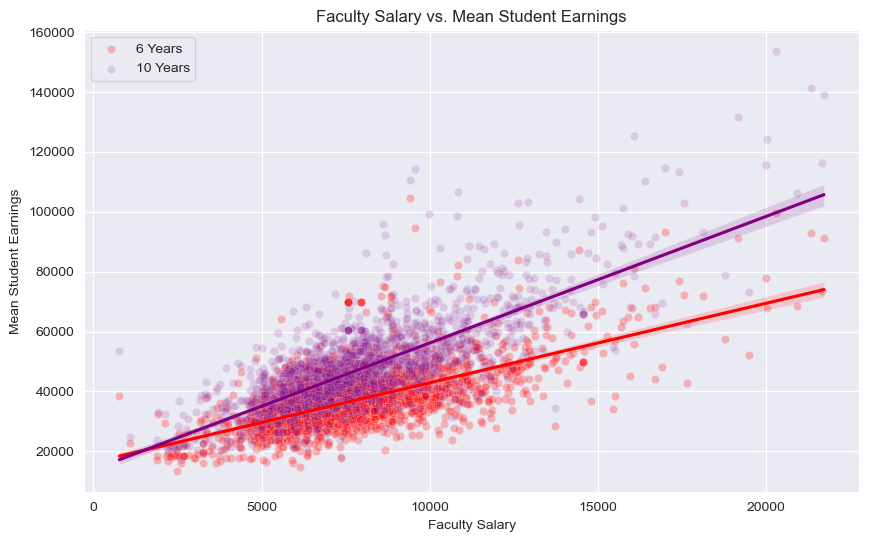

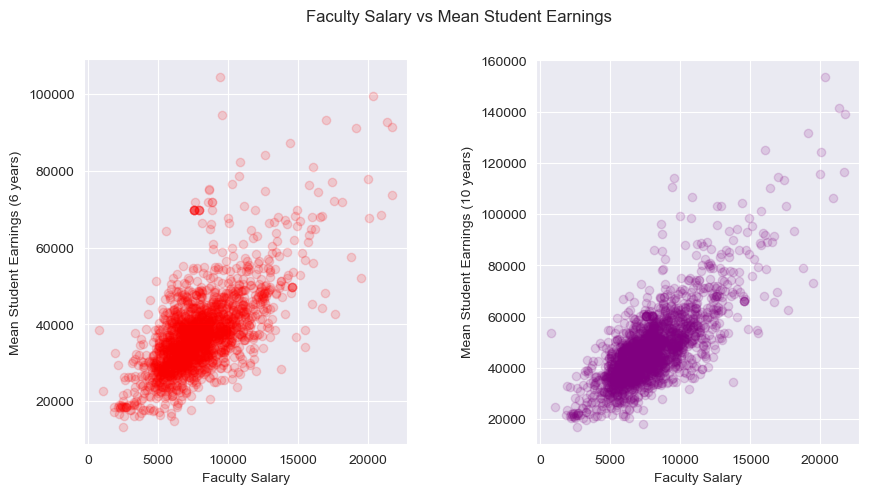

In [40]:
# Set the style
sns.set_style('darkgrid')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points
sns.scatterplot(x='Faculty\'s average salary per month', y='Mean Earnings (6 Yrs after Entry)', data=school_df, ax=ax, color='red', alpha=0.25, label='6 Years')
sns.scatterplot(x='Faculty\'s average salary per month', y='Mean Earnings (10 Yrs after Entry)', data=school_df, ax=ax, color='purple', alpha=0.15, label='10 Years')

# Add the lines of best fit
sns.regplot(x='Faculty\'s average salary per month', y='Mean Earnings (6 Yrs after Entry)', data=school_df, ax=ax, scatter=False, color='red')
sns.regplot(x='Faculty\'s average salary per month', y='Mean Earnings (10 Yrs after Entry)', data=school_df, ax=ax, scatter=False, color='purple')

# Set the title and labels
ax.set_title('Faculty Salary vs. Mean Student Earnings')
ax.set_xlabel('Faculty Salary')
ax.set_ylabel('Mean Student Earnings')

# Add the legend
ax.legend()

# Show the plot
plt.show()


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot faculty salary vs mean student earnings for 6 years on the first subplot
ax1.scatter('Faculty\'s average salary per month', 'Mean Earnings (6 Yrs after Entry)', data=school_df, alpha=0.15, color="red")
ax1.set_xlabel('Faculty Salary')
ax1.set_ylabel('Mean Student Earnings (6 years)')

# Plot faculty salary vs mean student earnings for 10 years on the second subplot
ax2.scatter('Faculty\'s average salary per month', 'Mean Earnings (10 Yrs after Entry)', data=school_df, alpha=0.15, color="purple")
ax2.set_xlabel('Faculty Salary')
ax2.set_ylabel('Mean Student Earnings (10 years)')

# Set the title of the figure
fig.suptitle('Faculty Salary vs Mean Student Earnings')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()

Both of these plots show a direct positive relationship between Faculty Salary and Student Mean Earnings both 6 years and 10 years after graduation. Typically, the highest earning students have gone to universities with faculty that were paid the most. Also, the salary after 10 years is affected to a greater extent. This aligns with our previous findings, as the wealthier and more priveleged families would have more resources and be able to provide more support to their children. Therefore, they would end up earning more in the future compared to students who are from less priveleged families and backgrounds. 

### Multi-Variate Regression (Faculty Salary + Full-Time Faculty Rate vs. Student Completion Rate/Mean Student Earnings)

In [27]:
import statsmodels.api as sm

# Drop rows with missing or infinite values in any of the relevant columns
school_df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values with NaN
school_df.dropna(subset=['Faculty\'s average salary per month', '150% Completion Rate at 4Yr (%)', 
                         'Full-time Faculty Rate (%)', 'Mean Earnings (6 Yrs after Entry)', 
                         'Mean Earnings (10 Yrs after Entry)'], inplace=True)

# Extract the independent variables (faculty salary and faculty full-time rate) and 
# the dependent variable (student completion rate)
X = school_df[['Faculty\'s average salary per month', 'Full-time Faculty Rate (%)']]
y = school_df['150% Completion Rate at 4Yr (%)']

# Add a constant to the independent variables for the intercept term in the regression model
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     150% Completion Rate at 4Yr (%)   R-squared:                       0.282
Model:                                         OLS   Adj. R-squared:                  0.281
Method:                              Least Squares   F-statistic:                     375.3
Date:                             Sat, 29 Apr 2023   Prob (F-statistic):          3.06e-138
Time:                                     19:02:34   Log-Likelihood:                 618.31
No. Observations:                             1918   AIC:                            -1231.
Df Residuals:                                 1915   BIC:                            -1214.
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
                                         coef    std err          t      P>|t|  

In [13]:
# Calculate predicted values
y_pred = model.predict(X)

# Calculate R-squared
r2 = model.rsquared

# Calculate Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("R-squared: {:.4f}".format(r2))
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))

R-squared: 0.2785
Mean Squared Error (MSE): 0.0321
Root Mean Squared Error (RMSE): 0.1792


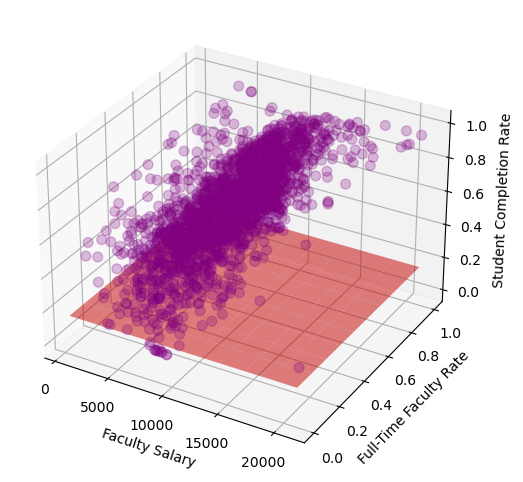

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

# create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
faculty_salary = school_df['Faculty\'s average salary per month']
full_time_faculty_rate = school_df['Full-time Faculty Rate (%)']
student_completion_rate = school_df['150% Completion Rate at 4Yr (%)']
# plot data points
ax.scatter(school_df['Faculty\'s average salary per month'], school_df['Full-time Faculty Rate (%)'], 
           school_df['150% Completion Rate at 4Yr (%)'], alpha=0.25, s=50, c='purple')

# fit plane to data
model = LinearRegression()
model.fit(X, student_completion_rate)
x_surf, y_surf = np.meshgrid(np.linspace(faculty_salary.min(), faculty_salary.max(), 10),
                             np.linspace(full_time_faculty_rate.min(), full_time_faculty_rate.max(), 10))
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

# set labels
ax.set_xlabel('Faculty Salary')
ax.set_ylabel('Full-Time Faculty Rate')
ax.set_zlabel('Student Completion Rate')

# add legend
#ax.legend(['Faculty Salary','Full-Time Faculty Rate','Student Completion Rate'])
plt.show()

A direct causal link cannot be established, since the R-Sqaured value is weak (0.279). However, the p-values are much lower than a pre-determined alpha value of 0.05, so these input variables are statistically significant. This 3D plot shows us that there is some positive correlation between Faculty variables and the Student Completion Rate. A more robust study needs to be carried out to properly assess this problem and more input variables need to be added to this model to account for the numerous factors at play for a student completing their 4-year degree. 

#### Multi-Variate Regression (Faculty Salary + Full-Time Faculty Rate vs. Student Mean Earnings)

In [34]:
# Extract the independent variables (faculty salary and faculty full-time rate) and the dependent variable (student completion rate)
X = school_df[['Faculty\'s average salary per month', 'Full-time Faculty Rate (%)']]
y1 = school_df['Mean Earnings (6 Yrs after Entry)']
y2 = school_df['Mean Earnings (10 Yrs after Entry)']

# Add a constant to the independent variables for the intercept term in the regression model
X = sm.add_constant(X)

# Fit the multivariate regression model
model_6yrs = sm.OLS(y1, X).fit()
model_10yrs = sm.OLS(y2, X).fit()
# Print the model summary
print(model_6yrs.summary())
print(model_10yrs.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Mean Earnings (6 Yrs after Entry)   R-squared:                       0.433
Model:                                           OLS   Adj. R-squared:                  0.432
Method:                                Least Squares   F-statistic:                     730.9
Date:                               Wed, 26 Apr 2023   Prob (F-statistic):          1.39e-236
Time:                                       08:26:25   Log-Likelihood:                -19950.
No. Observations:                               1918   AIC:                         3.991e+04
Df Residuals:                                   1915   BIC:                         3.992e+04
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                                         coef    std err    

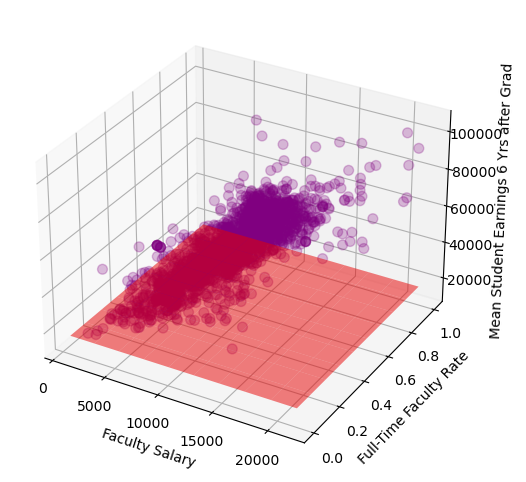

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

# create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
faculty_salary = school_df['Faculty\'s average salary per month']
full_time_faculty_rate = school_df['Full-time Faculty Rate (%)']
me_6 = school_df['Mean Earnings (6 Yrs after Entry)']
me_10 = school_df['Mean Earnings (10 Yrs after Entry)']
# plot data points
ax.scatter(school_df['Faculty\'s average salary per month'], school_df['Full-time Faculty Rate (%)'], school_df['Mean Earnings (6 Yrs after Entry)'], alpha=0.25, s=50, c='purple')

# fit plane to data
model = LinearRegression()
model.fit(X, me_6)
x_surf, y_surf = np.meshgrid(np.linspace(faculty_salary.min(), faculty_salary.max(), 10),
                             np.linspace(full_time_faculty_rate.min(), full_time_faculty_rate.max(), 10))
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

# set labels
ax.set_xlabel('Faculty Salary')
ax.set_ylabel('Full-Time Faculty Rate')
ax.set_zlabel('Mean Student Earnings 6 Yrs after Grad')

# add legend
#ax.legend(['Faculty Salary','Full-Time Faculty Rate','Student Completion Rate'])
plt.show()

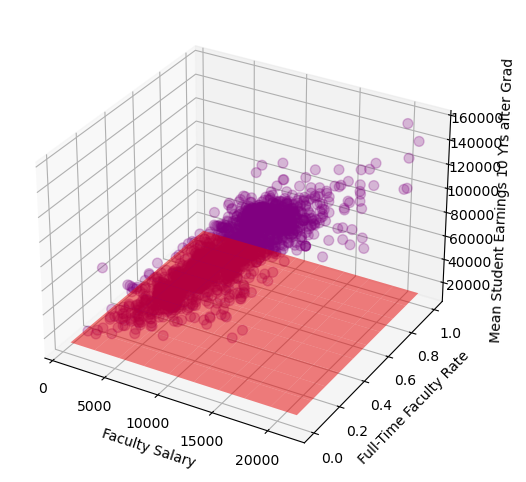

In [39]:
# create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(school_df['Faculty\'s average salary per month'], school_df['Full-time Faculty Rate (%)'], school_df['Mean Earnings (10 Yrs after Entry)'], alpha=0.25, s=50, c='purple')

# fit plane to data
model = LinearRegression()
model.fit(X, me_10)
x_surf, y_surf = np.meshgrid(np.linspace(faculty_salary.min(), faculty_salary.max(), 10),
                             np.linspace(full_time_faculty_rate.min(), full_time_faculty_rate.max(), 10))
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

# set labels
ax.set_xlabel('Faculty Salary')
ax.set_ylabel('Full-Time Faculty Rate')
ax.set_zlabel('Mean Student Earnings 10 Yrs after Grad')

# add legend
#ax.legend(['Faculty Salary','Full-Time Faculty Rate','Student Completion Rate'])
plt.show()

The R-Squared values for both 6 years and 10 years drastically increased. This is a good indicator that the Faculty variables have a stronger influence over Student Earnings. The multivariate regression model for student earnings 10 years after shows us a p-value for the full-time faculty rate of 0.767. This variable is statistically insignificant to mean student earnings. Both of these models reinforce the hypothesis from the earlier scatterplots which shows us that higher faculty salaries positively influence student mean earnings after graduation and student completion rates at all universities (private and public).  

## Research Question 4: Regional Differences


1.) Do educational resources differ across states?

2.) Do the performances of students after graduation differ across states?

3.) What are some valid factors for predicting mean earnings after graduation?

In [12]:
## Map 1
enroll_statewise_df = school_df[['School State','Student Enrollment Size']].groupby(['School State']).sum()

In [13]:
enroll_statewise_df = enroll_statewise_df.reset_index()

In [14]:
# Define the color scale
color_scale = folium.LinearColormap(['green', 'yellow', 'red'], vmin=enroll_statewise_df['Student Enrollment Size'].min(), vmax=enroll_statewise_df['Student Enrollment Size'].max())

# Create the map
enrollment_statewise= folium.Map(location=[37, -102], zoom_start=4)

# Add the choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=enroll_statewise_df,
    columns=['School State', 'Student Enrollment Size'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value',
    highlight=True,
    bins=5,
    reset=True
).add_to(enrollment_statewise)

# Display the map
enrollment_statewise




The enrollment size map suggests that students tend to go the universities along the coast line(i.e. west coast CA; east coast: New York). 

Inland areas have smaller enrollment sizes compared to the coastal areas, this could suggest a number of possible factors at play:

1. Population density: In general, coastal areas tend to be more densely populated than inland areas. This means that there may be more potential students in these areas, which could contribute to higher enrollment levels.

2. Access to educational resources: Coastal areas may have greater access to educational resources such as universities, colleges, and research institutions. This could make it more attractive for students to enroll in schools located in these areas, and could contribute to higher enrollment levels.

3. Economic factors: Coastal areas tend to be more affluent than inland areas, which could also contribute to higher enrollment levels. Students from wealthier families may have more resources to devote to education, and may be more likely to attend schools located in affluent areas.

In [15]:
## Map 2
earnings_statewise_df = school_df[['School State','Mean Earnings (6 Yrs after Entry)']].groupby(['School State']).mean().reset_index()

earnings_statewise_df.sort_values(by = "Mean Earnings (6 Yrs after Entry)")

School State  Mean Earnings (6 Yrs after Entry)
29           MP                       17100.000000
3            AS                       17500.000000
44           PR                       18722.321429
11           FM                       19000.000000
13           GU                       23850.000000
2            AR                       26955.000000
53           VI                       27000.000000
30           MS                       27120.930233
16           ID                       27161.904762
20           KY                       27766.176471
37           NM                       28509.090909
47           SC                       28956.410256
57           WV                       29057.142857
32           NC                       29142.281879
10           FL                       29195.847751
49           TN                       29763.025210
26           MI                       29807.633588
31           MT                       30013.043478
41           OK                       30173.076923
1            AL                       30194.117647
21           LA                       30229.629630
12           GA                       30886.896552
9            DE                       31283.333333
50           TX                       31504.262295
42           OR                       31798.245614
40           OH                       31825.217391
38           NV                       32210.714286
48           SD                       32260.869565
58           WY                       32290.000000
14           HI                       32356.250000
52           VA                       32447.933884
56           WI                       32619.736842
4            AZ                       32620.238095
6            CO                       32679.032258
19           KS                       32812.857143
15           IA                       32987.692308
51           UT                       33241.935484
33           ND                       33330.434783
17           IL                       33540.782123
23           MD                       33570.769231
24           ME                       33781.250000
18           IN                       33831.428571
54           VT                       33850.000000
5            CA                       34105.298013
28           MO                       34149.532710
36           NJ                       34786.868687
27           MN                       35056.250000
55           WA                       35258.333333
34           NE                       35533.333333
35           NH                       35839.285714
43           PA                       36089.338235
0            AK                       36850.000000
39           NY                       37018.892508
46           RI                       37573.684211
7            CT                       37589.285714
22           MA                       40452.941176
8            DC                       40528.571429
25           MH                                NaN
45           PW                                NaN

In [16]:
# Define the color scale
color_scale = folium.LinearColormap(['green', 'yellow', 'red'], vmin=earnings_statewise_df['Mean Earnings (6 Yrs after Entry)'].min(), vmax=earnings_statewise_df['Mean Earnings (6 Yrs after Entry)'].max())

# Create the map
earnings_statewise= folium.Map(location=[37, -102], zoom_start=4)

# Add the choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=earnings_statewise_df,
    columns=['School State', 'Mean Earnings (6 Yrs after Entry)'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value',
    highlight=True,
    bins=5,
    reset=True
).add_to(earnings_statewise)

# Display the map
earnings_statewise


The mean earnings state wise map shows: 
1. Coastal states vs inland differences are not so obvious here.

2. Some states have much higher mean earnings than others: Looking at the data, there are some states with mean earnings that are significantly higher than others.This suggests that there may be underlying factors contributing to these disparities, such as differences in industry, education, or workforce development.MA 

3. Some states have a relatively low mean earnings despite having high enrollment size: It's possible that some states with high enrollment size, such as California and Texas, may have a lower mean earnings compared to their coastal counterparts. This could suggest that while there may be a high demand for education in these states, there may not be enough high-paying job opportunities to support graduates after they complete their education.

In [17]:
## Map 3
private_statewise_df = school_df[school_df['School Ownership']=="private"][['School State','School Ownership']]


In [18]:
private_statewise_df = private_statewise_df.groupby(['School State'])["School Ownership"].count().reset_index()
private_statewise_df

School State  School Ownership
0            AK                 4
1            AL                40
2            AR                51
3            AZ                74
4            CA               510
5            CO                57
6            CT                46
7            DC                21
8            DE                12
9            FL               293
10           GA               100
11           GU                 1
12           HI                13
13           IA                57
14           ID                28
15           IL               182
16           IN                94
17           KS                41
18           KY                61
19           LA                79
20           MA               106
21           MD                50
22           ME                21
23           MI               124
24           MN                55
25           MO               105
26           MS                27
27           MT                10
28           NC                97
29           ND                13
30           NE                23
31           NH                20
32           NJ               115
33           NM                16
34           NV                31
35           NY               322
36           OH               178
37           OK                37
38           OR                49
39           PA               236
40           PR               127
41           RI                19
42           SC                59
43           SD                14
44           TN               107
45           TX               303
46           UT                46
47           VA               112
48           VT                13
49           WA                56
50           WI                59
51           WV                30
52           WY                 2

In [19]:
# Define the color scale
color_scale = folium.LinearColormap(['green', 'yellow', 'red'], vmin=private_statewise_df['School Ownership'].min(), vmax=private_statewise_df['School Ownership'].max())

# Create the map
private_statewise= folium.Map(location=[37, -102], zoom_start=4)

# Add the choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=private_statewise_df,
    columns=['School State', 'School Ownership'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value',
    highlight=True,
    bins=5,
    reset=True
).add_to(private_statewise)

# Display the map
private_statewise

The map shows number of private schools state-wise.
1. States with a higher number of private schools tend to have higher mean earnings after graduation. This can be observed from the fact that the states with the highest number of private schools (e.g., New York, Pennsylvania, Texas) also have higher mean earnings.

2. However, this trend is not universal, as some states with a lower number of private schools also have high mean earnings (e.g., California, Massachusetts).

3. The relationship between school ownership and mean earnings may also vary depending on the region. For example, states in the Northeast tend to have a higher number of private schools and higher mean earnings, while states in the Midwest and South may have a lower number of private schools but still have relatively high mean earnings.

4. Overall, it's important to note that school ownership is just one factor that can influence earnings after graduation, and other factors such as the type of degree and field of study, among others, may also play a role.

In [20]:
# Map 4
public_statewise_df = school_df[school_df['School Ownership']=="public"][['School State','School Ownership']]
public_statewise_df = public_statewise_df.groupby(['School State'])["School Ownership"].count().reset_index()
public_statewise_df

School State  School Ownership
0            AK                 5
1            AL                42
2            AR                35
3            AS                 1
4            AZ                41
5            CA               175
6            CO                33
7            CT                28
8            DC                 2
9            DE                 6
10           FL                94
11           FM                 1
12           GA                64
13           GU                 2
14           HI                10
15           IA                19
16           ID                 8
17           IL                63
18           IN                39
19           KS                36
20           KY                24
21           LA                35
22           MA                42
23           MD                31
24           ME                15
25           MH                 1
26           MI                48
27           MN                53
28           MO                43
29           MP                 1
30           MS                27
31           MT                19
32           NC                76
33           ND                14
34           NE                16
35           NH                13
36           NJ                39
37           NM                28
38           NV                 7
39           NY               111
40           OH               108
41           OK                62
42           OR                26
43           PA               100
44           PR                18
45           PW                 1
46           RI                 3
47           SC                34
48           SD                13
49           TN                48
50           TX               106
51           UT                17
52           VA                44
53           VI                 2
54           VT                 6
55           WA                48
56           WI                32
57           WV                39
58           WY                 8

In [21]:

# Define the color scale
color_scale = folium.LinearColormap(['green', 'yellow', 'red'], vmin=private_statewise_df['School Ownership'].min(), vmax=private_statewise_df['School Ownership'].max())

# Create the map
public_statewise= folium.Map(location=[37, -102], zoom_start=4)

# Add the choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=public_statewise_df,
    columns=['School State', 'School Ownership'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value',
    highlight=True,
    bins=5,
    reset=True
).add_to(public_statewise)

# Display the map
public_statewise

The map shows the number of public schools statewise.
1. The states with the highest number of public schools are California, New York, Texas, and Pennsylvania. These are also among the most populous states in the country, so this may reflect a greater need for public schools to serve large populations.

2. The states with the fewest number of public schools are Wyoming, American Samoa, the Northern Mariana Islands, and the Federated States of Micronesia. These are among the smallest and least populous states/territories in the US, so this may reflect a lack of demand for public education in these areas.

3. Some states with high numbers of public schools also have high numbers of private schools, such as Florida, Georgia, and Massachusetts. This suggests that there may be a high demand for education in general in these states, and that families have the means to choose between public and private options.

4. There are some regional variations in the number of public schools, with higher numbers in the Northeast and Midwest and lower numbers in the West and South. However, there are exceptions to this trend, such as California having a high number of public schools despite being a Western state.

In [22]:
# Map 5
fac_sal_statewise_df = school_df[['School State',"Faculty's average salary per month"]]
fac_sal_statewise_df = fac_sal_statewise_df.groupby(['School State'])["Faculty's average salary per month"].mean().reset_index()
fac_sal_statewise_df

School State  Faculty's average salary per month
0            AK                         7597.857143
1            AL                         6962.241379
2            AR                         5864.450980
3            AS                         4670.000000
4            AZ                         6788.453125
5            CA                         8669.774038
6            CO                         6816.017544
7            CT                         9699.452381
8            DC                         8711.444444
9            DE                         9189.000000
10           FL                         6115.900585
11           FM                         3085.000000
12           GA                         6079.644860
13           GU                         6064.333333
14           HI                         8700.866667
15           IA                         6864.981818
16           ID                         6647.000000
17           IL                         8012.741722
18           IN                         6902.907692
19           KS                         5883.540984
20           KY                         6111.559322
21           LA                         6279.438596
22           MA                         9335.223301
23           MD                         8066.960000
24           ME                         7542.785714
25           MH                         2185.000000
26           MI                         7942.738636
27           MN                         7761.590361
28           MO                         6577.043478
29           MP                         5042.000000
30           MS                         6170.647059
31           MT                         6227.043478
32           NC                         6285.129771
33           ND                         6550.100000
34           NE                         6803.750000
35           NH                         8031.041667
36           NJ                         7358.361446
37           NM                         6410.500000
38           NV                         7366.157895
39           NY                         7888.714286
40           OH                         6909.848101
41           OK                         5911.142857
42           OR                         7916.285714
43           PA                         7265.462766
44           PR                         3904.473684
45           PW                         1956.000000
46           RI                        10850.000000
47           SC                         6506.907692
48           SD                         6742.263158
49           TN                         6401.209877
50           TX                         6827.880000
51           UT                         7860.913043
52           VA                         7301.465347
53           VI                         6920.000000
54           VT                         7825.666667
55           WA                         7785.208333
56           WI                         7647.587302
57           WV                         5807.800000
58           WY                         6555.777778

In [23]:
# Define the color scale
color_scale = folium.LinearColormap(['green', 'yellow', 'red'], vmin=fac_sal_statewise_df["Faculty's average salary per month"].max())

# Create the map
fac_sal_statewise= folium.Map(location=[37, -102], zoom_start=4)

# Add the choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=fac_sal_statewise_df,
    columns=['School State', "Faculty's average salary per month"],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value',
    highlight=True,
    bins=5,
    reset=True
).add_to(fac_sal_statewise)

# Display the map
fac_sal_statewise

The map displays the average salary per month across states

1. There is significant variation in faculty salaries across different states in the United States, with some states offering considerably higher salaries than others.

2. The Northeast and West Coast regions tend to offer higher faculty salaries compared to other regions in the country.

3. Some states in the South and Midwest regions have lower average faculty salaries compared to the national average.

4. Territories such as Puerto Rico and the Virgin Islands have notably lower average faculty salaries than the rest of the states.

5. State policies, economic conditions, and regional cost-of-living variations are some of the factors that may contribute to the observed variation in faculty salaries.

Understanding these regional variations in faculty salaries is important for policymakers and educators to ensure that teacher pay is equitable and commensurate with the cost of living and local economic conditions.

## Regression and Predictive Model

## Correlation Matrix

In [11]:
plt.figure(figsize=(25,20))
numeric_df = school_df.drop(['School Name', 'School ID', 'School State', 'School Ownership', 'Student Enrollment All'], axis=1)
### We created a new dataframe with only numeric variables for correlation matrix.

<Figure size 1800x1440 with 0 Axes>

In [12]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 38 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Full-time Faculty Rate (%)                              3496 non-null   float64
 1   Faculty's average salary per month                      3863 non-null   float64
 2   Student Enrollment Size                                 5658 non-null   float64
 3   Male Students (%)                                       5658 non-null   float64
 4   Female Students (%)                                     5658 non-null   float64
 5   Retention Rate 4Yr (%)                                  2055 non-null   float64
 6   Attendance Cost per Academic Year                       3274 non-null   float64
 7   Avg Cost for public                                     1814 non-null   float64
 8   Avg Cost for private                  

Text(0.5, 1.0, 'Heatmap Correlation between the Input features')

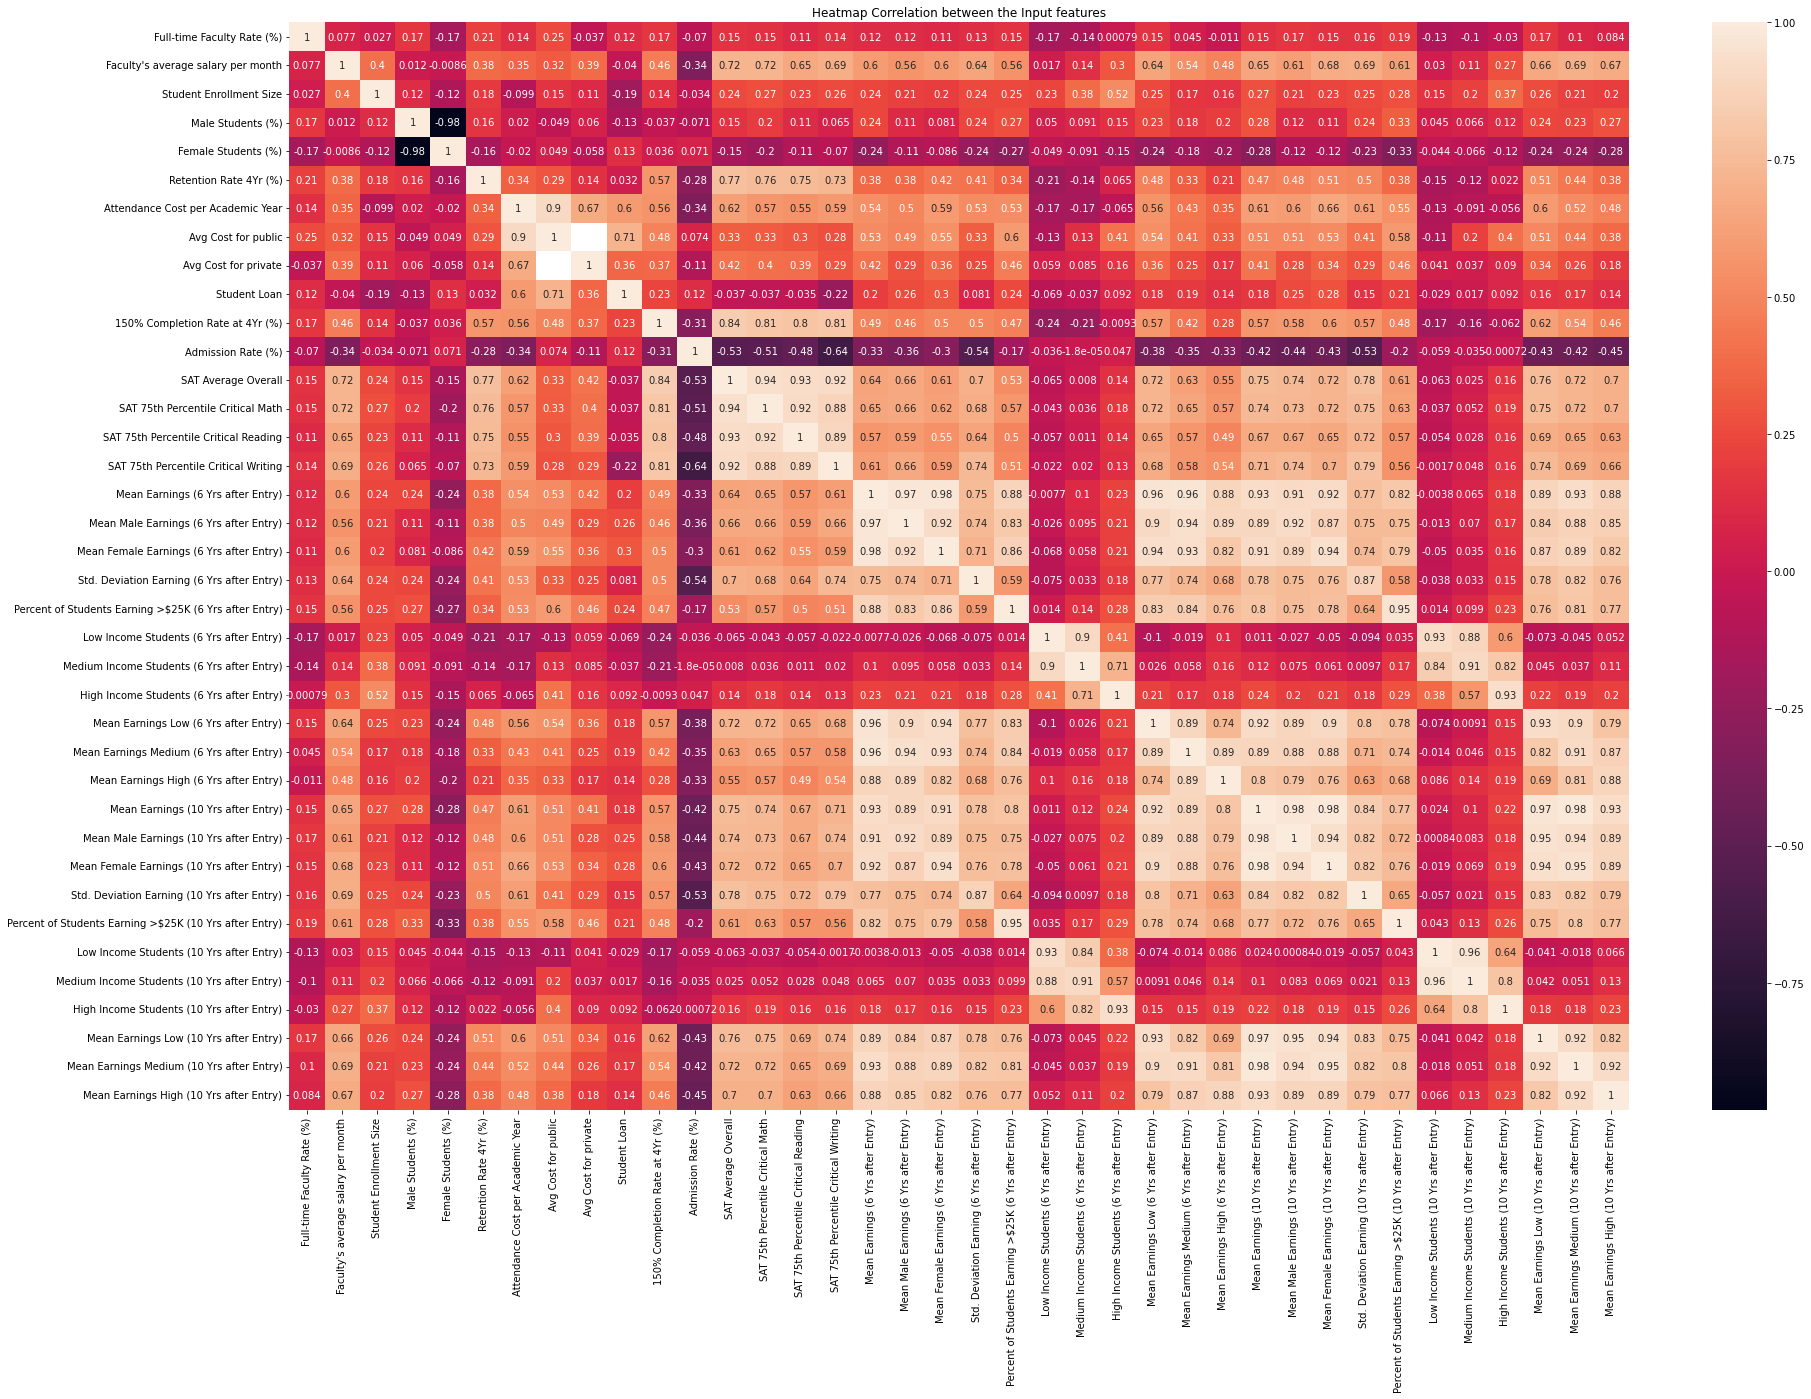

In [13]:
plt.subplots(figsize=(30, 20))
sns.heatmap(numeric_df.corr(), annot=True) # Correlation between the Columns to find the highly correlated columns to remove multi-collinearity
plt.title('Heatmap Correlation between the Input features')

<AxesSubplot:>

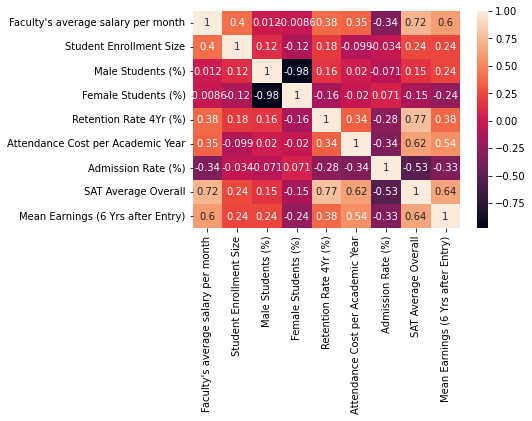

In [14]:
#### We decided 0.2 correlation as the threshold, the correlation matrix is:
corr_df = numeric_df[["Faculty's average salary per month","Student Enrollment Size", "Male Students (%)", "Female Students (%)",
                      "Retention Rate 4Yr (%)","Attendance Cost per Academic Year", 'Admission Rate (%)',"SAT Average Overall",
                     "Mean Earnings (6 Yrs after Entry)"]]
sns.heatmap(corr_df.corr(), annot=True)

Above is the correlation matrix of all the numeric variables that have more than 0.2 correlation coefficients with mean earnings 6 years after graduation.

Key takeaways:

1. SAT score and Faculty's monthly salary has the strongest correlation with meaning earnings after graduation.

2. Percentage of male students has positive correlation with earnings while percentage of female students has negative correlation;

3. Admission rate also has negative correlation with earnings.


## Regression Model and Predictions


In [15]:
### Next, we wanted to build up a regression model so that we can compare and contrast among variables.
reg_df = school_df[['School State', 'School Ownership', "Faculty's average salary per month","Student Enrollment Size", "Male Students (%)", "Female Students (%)",
                      "Retention Rate 4Yr (%)","Attendance Cost per Academic Year", 'Admission Rate (%)',"SAT Average Overall",
                     "Mean Earnings (6 Yrs after Entry)"]].dropna()## created and cleaned the data. 
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 5863
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   School State                        989 non-null    object 
 1   School Ownership                    989 non-null    object 
 2   Faculty's average salary per month  989 non-null    float64
 3   Student Enrollment Size             989 non-null    float64
 4   Male Students (%)                   989 non-null    float64
 5   Female Students (%)                 989 non-null    float64
 6   Retention Rate 4Yr (%)              989 non-null    float64
 7   Attendance Cost per Academic Year   989 non-null    float64
 8   Admission Rate (%)                  989 non-null    float64
 9   SAT Average Overall                 989 non-null    float64
 10  Mean Earnings (6 Yrs after Entry)   989 non-null    float64
dtypes: float64(9), object(2)
memory usage: 92.7+

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select relevant features and target variable
features = ['School State', 'School Ownership', 'Full-time Faculty Rate (%)',
            "Faculty's average salary per month", 'Student Enrollment Size',
            'Male Students (%)', 'Female Students (%)', 'Retention Rate 4Yr (%)',
            'Attendance Cost per Academic Year', 'Admission Rate (%)']
target = 'Mean Earnings (6 Yrs after Entry)'

# Preprocess the data
X = school_df[features]
y = school_df[target]

# Encode categorical variables: states and ownership
cat_cols = ['School State', 'School Ownership']
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X[cat_cols])
X_encoded = pd.concat([
    X.drop(columns=cat_cols),
    pd.DataFrame(encoder.transform(X[cat_cols]).toarray(), columns=encoder.get_feature_names(cat_cols))
], axis=1)

# Fill missing values
X_encoded.fillna(X_encoded.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and coefficients
feature_names = list(X_encoded.columns)
coef_values = model.coef_

# Print feature names and coefficients
for feature, coef in zip(feature_names, coef_values):
    print(f'{feature}: {coef}')


Full-time Faculty Rate (%): 657.0153904514276
Faculty's average salary per month: 1.5362986862009809
Student Enrollment Size: 0.16601955768230225
Male Students (%): 1689.292394532397
Female Students (%): -4294.247944060772
Retention Rate 4Yr (%): -1712.161978341212
Attendance Cost per Academic Year: 0.2412329528101509
Admission Rate (%): -2020.138949422574
School State_AK: 2979.3049409467944
School State_AL: -728.0400514586497
School State_AR: -1343.8901162748998
School State_AS: -7073.038086487697
School State_AZ: 11.75533748413227
School State_CA: -270.76672969918326
School State_CO: 433.10614658754935
School State_CT: 528.6884387997783
School State_DC: 2148.793833386245
School State_DE: -1568.787764056875
School State_FL: -1853.0720181938254
School State_FM: -4523.293996114687
School State_GA: 180.06666195631806
School State_GU: 8957.517880038662
School State_HI: -1808.1637498365085
School State_IA: -295.0951432345082
School State_ID: -1383.6743132414044
School State_IL: 475.6554150

In [20]:
# Calculate the R-squared value
r2 = model.score(X_test, y_test)
print('R-squared:', r2)


R-squared: 0.2592021044185264


We can see here the explainatory power of our model is not particularly strong. However, the aim of building up the model is to see the direction and scale of the effect each variable has on the outcome, so that we can get a general idea of how information comes together.

## Function for Predictions

In [22]:
### We then used the coefficents here to build up a predictive model to make our results more intuitive.
import pickle

def predict_earnings(model_path, encoder_path, input_data):
    # Load the saved model
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    
    # Load the saved encoder
    with open(encoder_path, 'rb') as file:
        encoder = pickle.load(file)
    
    # Encode categorical variables that we input
    cat_cols = ['School State', 'School Ownership']
    input_data_encoded = pd.concat([
        input_data.drop(columns=cat_cols),
        pd.DataFrame(encoder.transform(input_data[cat_cols]).toarray(), columns=encoder.get_feature_names(cat_cols))
    ], axis=1)
    
    # Fill missing values
    input_data_encoded.fillna(input_data_encoded.mean(), inplace=True)
    
    # Make prediction
    prediction = model.predict(input_data_encoded)
    
    return prediction


In [27]:
# Save the model and encoder as pickle files

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

# Use the predict_earnings function

input_dict = {
    'School State': 'MA',
    'School Ownership': 'private',
    'Full-time Faculty Rate (%)': 0.10,
    "Faculty's average salary per month": 10000,
    'Student Enrollment Size': 6000,
    'Male Students (%)': 0.6,
    'Female Students (%)': 0.4,
    'Retention Rate 4Yr (%)': 0.8,
    'Attendance Cost per Academic Year': 30000,
    'Admission Rate (%)': 0.6
}

prediction = predict_earnings('model.pkl', 'encoder.pkl', pd.DataFrame.from_dict([input_dict]))
print(prediction)


[40461.30796341]


To play with the model, we can change state from MA to NY, or change "private" to "public" , or change the percentage of male and female students to verify our findings. Our model uses our key findings to make a somewhat reliable prediction of a student's potential earnings based on their input factors like the state, ownership, faculty salary, and so on. 

### Key Findings Summarized:

1.) On average, ten years after enrollment at a university, male students earn about \\$60,000 more than female students.
<br>

2.) Students who attend smaller schools (<10,000 students) earn more money, both male and female.
<br>

3.) SAT scores have the strongest positive correlation with mean earnings - for both females and males.
<br>

4.) University admission rates have the strongest negative correlation with mean earnings for both sexes. 
<br>

5.) Coastal areas have more educational resources than inland schools. However, the earnings of students after graduation are not all that different besides some outliers.
<br>

6.) Private school students have a higher chance of taking out loans than students who attend public schools.
<br>

7.) Higher education costs affect student salaries 6 years after graduation, but doesn't significantly increase average 10 years after graduation.
<br>

8.) Higher faculty salaries positively influence student completion rates up to an upper limit of \\$15,000 per month.
<br>

9.) Higher faculty salaries also contribute to higher wages for students after graduation.